In [60]:
import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from load import load_train_data

pd.set_option('display.max_columns', None)

In [61]:
# Load data
train_data = load_train_data(local=True)
train_data.shape

(260601, 39)

In [62]:
# Namen aller Spalten anzeigen
print(train_data.columns)

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

In [63]:
# Filter dataset
cols_superstructure_type = [col for col in train_data.columns if 'superstructure' in col]
structure_type = train_data[cols_superstructure_type].copy()
structure_type.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,
802906,1,1,0,0,0,0,0,0,0,0,0
28830,0,1,0,0,0,0,0,0,0,0,0
94947,0,1,0,0,0,0,0,0,0,0,0
590882,0,1,0,0,0,0,1,1,0,0,0
201944,1,0,0,0,0,0,0,0,0,0,0


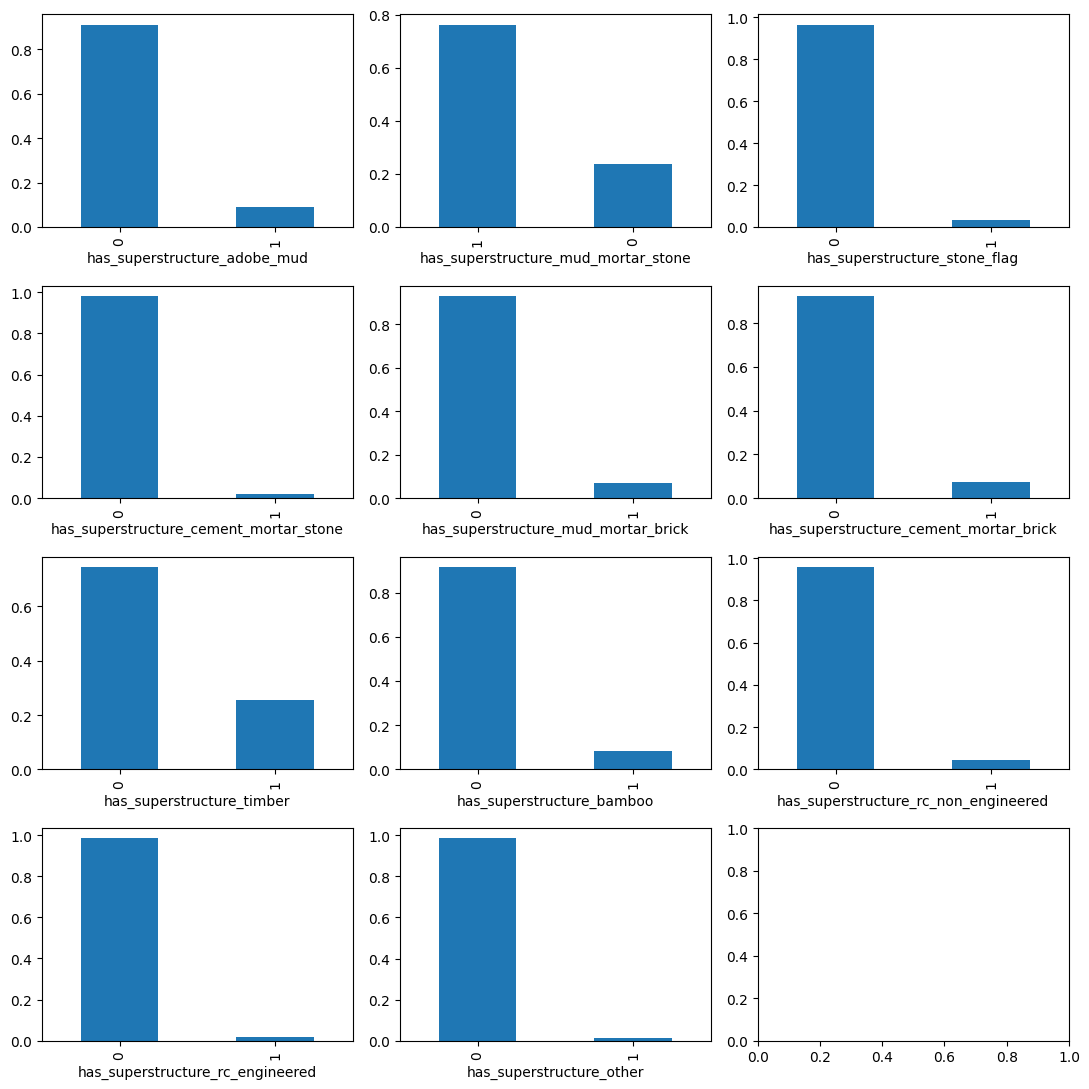

In [64]:
# Plot the distribution of building characteristics
fig, axs = plt.subplots(4, 3, figsize=(11, 11), tight_layout=True)

for i, col in enumerate(cols_superstructure_type):
    structure_type[col].value_counts(normalize=True).plot(kind='bar', ax=axs.flatten()[i])

In [65]:
# Calculate how many unique combinations of structure type
#structure_type['all_type'] = structure_type.sum(axis=1)
#structure_type['all_type'].nunique()

In [66]:
#threshold = 0.01
#all_type_percent = structure_type['all_type'].value_counts(normalize=True).head(20)
#all_type_percent[all_type_percent > threshold]

In [67]:
all_type_percent[all_type_percent > threshold].cumsum().iloc[-1]

0.9938142984869589

In [68]:
#Kombinationszeichenketten erstellen
def create_combination(row):
    types = [col for col in structure_type.columns if row[col] == 1]
    return ', '.join(types)

structure_type['combination'] = structure_type.apply(create_combination, axis=1)

#Anzahl eindeutiger Kombinationen berechnen
unique_combinations = structure_type['combination'].nunique()
print(f"Anzahl eindeutiger Kombinationen: {unique_combinations}")


Anzahl eindeutiger Kombinationen: 505


In [78]:
total_entries = len(structure_type)

# Count how often each combination occurs and sort the results
combination_counts = structure_type['combination'].value_counts()

# Display the most common combinations and their percentage of the total
print("Most common combinations:")
most_common_combinations = combination_counts.head(12)
for combination, count in most_common_combinations.items():
    percentage = (count / len(structure_type)) * 100  # Calculate the percentage of total entries
    print(f"{combination}: {count} ({percentage:.2f}%)")

# Display the least common combinations and their percentage of the total
print("\nLeast common combinations:")
least_common_combinations = combination_counts.tail(10)count
for combination, count in least_common_combinations.items():
    percentage = (count / total_entries) * 100
    print(f"{combination}: {count} ({percentage:.2f}%)")

Most common combinations:
has_superstructure_mud_mortar_stone: 137134 (52.62%)
has_superstructure_mud_mortar_stone, has_superstructure_timber: 28861 (11.07%)
has_superstructure_cement_mortar_brick: 10106 (3.88%)
has_superstructure_mud_mortar_stone, has_superstructure_timber, has_superstructure_bamboo: 9980 (3.83%)
has_superstructure_adobe_mud: 7229 (2.77%)
has_superstructure_mud_mortar_brick: 6144 (2.36%)
has_superstructure_timber: 5145 (1.97%)
has_superstructure_rc_non_engineered: 4167 (1.60%)
has_superstructure_adobe_mud, has_superstructure_mud_mortar_brick: 3925 (1.51%)
has_superstructure_timber, has_superstructure_bamboo: 3558 (1.37%)
has_superstructure_adobe_mud, has_superstructure_mud_mortar_stone: 3502 (1.34%)
has_superstructure_rc_engineered: 2594 (1.00%)

Least common combinations:
has_superstructure_mud_mortar_stone, has_superstructure_cement_mortar_stone, has_superstructure_mud_mortar_brick, has_superstructure_other: 1 (0.00%)
has_superstructure_mud_mortar_stone, has_superst

In [87]:
# Anzahl der Vorkommen jeder Kombination zählen
combination_counts = structure_type['combination'].value_counts()

# Kombinationen filtern, die genau einmal vorkommen
single_entry_combinations = combination_counts[combination_counts == 1]

# Anzahl der eindeutigen Kombinationen mit nur einem Eintrag
print(f"Anzahl der eindeutigen Kombinationen mit genau einem Eintrag: {len(single_entry_combinations)}")

# Einzelne Einträge und ihren prozentualen Anteil an der Gesamtheit anzeigen
print("\nKombinationen mit genau einem Eintrag:")
for combination, count in single_entry_combinations.items():
    percentage = (count / total_entries) * 100  # Berechnung des prozentualen Anteils der Gesamteinträge
    print(f"{combination}: {count} ({percentage:.2f}%)")


Anzahl der eindeutigen Kombinationen mit genau einem Eintrag: 159

Kombinationen mit genau einem Eintrag:
has_superstructure_mud_mortar_stone, has_superstructure_stone_flag, has_superstructure_cement_mortar_stone, has_superstructure_mud_mortar_brick, has_superstructure_cement_mortar_brick: 1 (0.00%)
has_superstructure_mud_mortar_stone, has_superstructure_stone_flag, has_superstructure_cement_mortar_stone, has_superstructure_other: 1 (0.00%)
has_superstructure_adobe_mud, has_superstructure_mud_mortar_stone, has_superstructure_cement_mortar_stone, has_superstructure_mud_mortar_brick, has_superstructure_timber, has_superstructure_bamboo, has_superstructure_other: 1 (0.00%)
has_superstructure_stone_flag, has_superstructure_cement_mortar_brick, has_superstructure_timber, has_superstructure_rc_non_engineered: 1 (0.00%)
has_superstructure_mud_mortar_brick, has_superstructure_cement_mortar_brick, has_superstructure_timber, has_superstructure_rc_non_engineered, has_superstructure_other: 1 (0.00

In [79]:
# Gesamtzahl der Einträge im DataFrame
total_entries = len(structure_type)

# Prozentualer Anteil der häufigsten Kombination
percent_haeufigste = (combination_counts.iloc[0] / total_entries) * 100

# Da die seltensten Kombinationen jeweils nur einmal vorkommen, berechnen wir, wie viele Kombinationen den minimalen Zählwert haben
# und teilen diese Anzahl durch die Gesamtzahl der Einträge
unique_min_counts = combination_counts[combination_counts == 1].count()
percent_seltenste = (unique_min_counts / total_entries) * 100

print(f"Prozentualer Anteil der häufigsten Kombination: {percent_haeufigste:.2f}%")
print(f"Prozentualer Anteil aller seltensten Kombinationen zusammen: {percent_seltenste:.2f}%")


Prozentualer Anteil der häufigsten Kombination: 52.62%
Prozentualer Anteil aller seltensten Kombinationen zusammen: 0.06%


In [80]:
# Wenn 'building_id' der Index in 'structure_type' ist, konvertieren Sie ihn in eine Spalte
if 'building_id' in structure_type.index.names:
    structure_type.reset_index(inplace=True)

# Wenn 'building_id' der Index in 'train_data' ist, konvertieren Sie ihn in eine Spalte
if 'building_id' in train_data.index.names:
    train_data.reset_index(inplace=True)

# Nachdem sichergestellt wurde, dass 'building_id' in beiden DataFrames als Spalte vorhanden ist, führen Sie den Merge durch
merged_df = pd.merge(structure_type, train_data[['building_id', 'damage_grade']], on='building_id')

# Filtern des verknüpften DataFrames für nur die häufigsten Kombinationen
filtered_df = merged_df[merged_df['combination'].isin(most_common_combinations.index)]

# Gruppieren des gefilterten DataFrames nach 'combination' und 'damage_grade'
grouped_df = filtered_df.groupby(['combination', 'damage_grade']).size().reset_index(name='count')

# Anzeigen der gruppierten Daten
print(grouped_df)


                                          combination  damage_grade  count
0                        has_superstructure_adobe_mud             1    244
1                        has_superstructure_adobe_mud             2   4126
2                        has_superstructure_adobe_mud             3   2859
3   has_superstructure_adobe_mud, has_superstructu...             1     28
4   has_superstructure_adobe_mud, has_superstructu...             2   2407
5   has_superstructure_adobe_mud, has_superstructu...             3   1490
6   has_superstructure_adobe_mud, has_superstructu...             1    108
7   has_superstructure_adobe_mud, has_superstructu...             2   2187
8   has_superstructure_adobe_mud, has_superstructu...             3   1207
9              has_superstructure_cement_mortar_brick             1   4169
10             has_superstructure_cement_mortar_brick             2   5514
11             has_superstructure_cement_mortar_brick             3    423
12                has_sup

/tmp/ipykernel_6616/2194799712.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Stellt sicher, dass die Beschriftungen nicht abgeschnitten werden


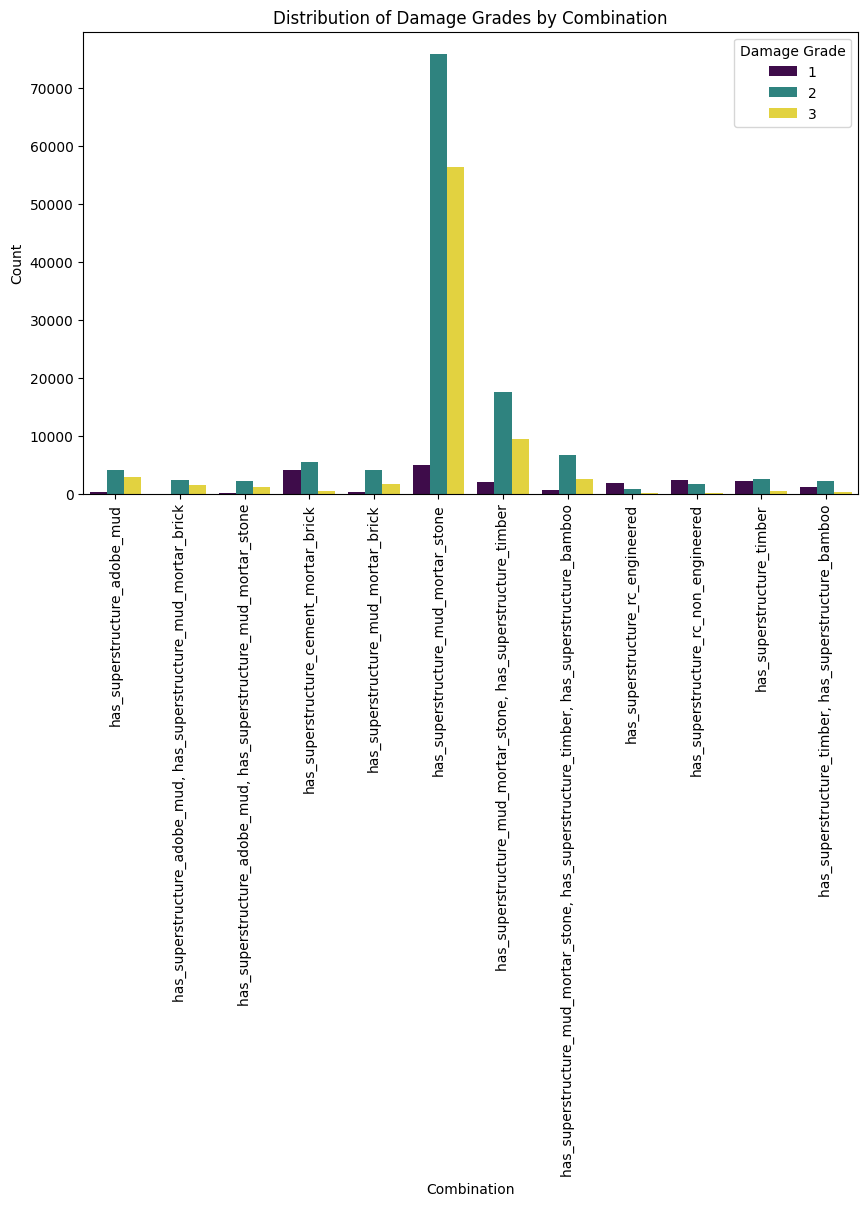

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stellen Sie sicher, dass Ihr DataFrame 'grouped_df' die gruppierten Daten enthält, wie im vorherigen Beispiel beschrieben

# Verwenden Sie Seaborn, um ein gruppiertes Balkendiagramm zu erstellen
plt.figure(figsize=(10, 6))  # Einstellen der Größe des Diagramms
sns.barplot(x='combination', y='count', hue='damage_grade', data=grouped_df, palette='viridis')

# Verbesserung der Diagramm-Darstellung
plt.xticks(rotation=90)  # Drehen der X-Achsen-Beschriftungen für bessere Lesbarkeit
plt.xlabel('Combination')  # Beschriften der X-Achse
plt.ylabel('Count')  # Beschriften der Y-Achse
plt.title('Distribution of Damage Grades by Combination')  # Hinzufügen eines Titels
plt.legend(title='Damage Grade')  # Hinzufügen einer Legende mit Titel

# Anzeigen des Diagramms
plt.tight_layout()  # Stellt sicher, dass die Beschriftungen nicht abgeschnitten werden
plt.show()


/tmp/ipykernel_6616/1560824252.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Stellt sicher, dass die Beschriftungen nicht abgeschnitten werden


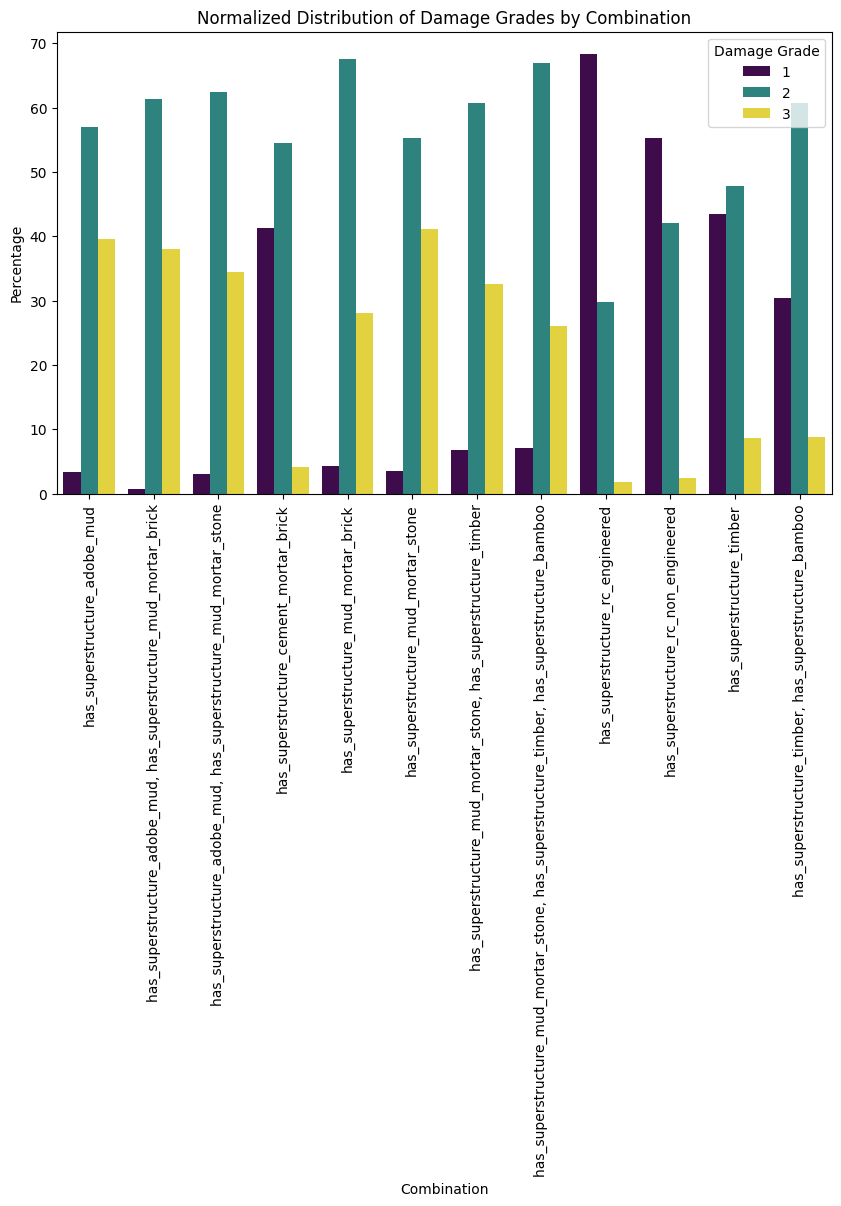

In [82]:
# Berechnen der Gesamtanzahl der Beobachtungen für jede Kombination
grouped_df['total_count'] = grouped_df.groupby('combination')['count'].transform('sum')

# Umwandlung der 'count'-Werte in Prozent
grouped_df['percentage'] = (grouped_df['count'] / grouped_df['total_count']) * 100

#Erstellung des Balkendiagramms

plt.figure(figsize=(10, 6))  # Einstellen der Größe des Diagramms
sns.barplot(x='combination', y='percentage', hue='damage_grade', data=grouped_df, palette='viridis')

# Verbesserung der Diagramm-Darstellung
plt.xticks(rotation=90)  # Drehen der X-Achsen-Beschriftungen für bessere Lesbarkeit
plt.xlabel('Combination')  # Beschriften der X-Achse
plt.ylabel('Percentage')  # Beschriften der Y-Achse mit 'Percentage'
plt.title('Normalized Distribution of Damage Grades by Combination')  # Hinzufügen eines Titels
plt.legend(title='Damage Grade')  # Hinzufügen einer Legende mit Titel

# Anzeigen des Diagramms
plt.tight_layout()  # Stellt sicher, dass die Beschriftungen nicht abgeschnitten werden
plt.show()
